In [1]:
import numpy as np
import random as rn
from time import perf_counter as pc
import matplotlib.pyplot as plt

from main import MCNeuralNetwork, SUNN, MCSimpleEnsemble, MCSoupClassifier, MCSoupRegressor, generate_model, TTSplit, cross_val, r2d2, normalize

from sklearn.datasets import load_diabetes
from sklearn.neural_network import MLPRegressor

In [12]:
# Single test
X, Y = load_diabetes(return_X_y=True)

X, _ = normalize(X)
Y, _ = normalize(Y)

x1, x2, y1, y2 = TTSplit(X, Y)

# Make MCnet params
Ieta_gen    = 3         # Done 1
Beta_gen    = 8         # Done 2
Gamma_gen   = 1         # Done 1

Ieta_fit    = 3         # Done 1
Beta_fit    = 5         # Done 2
Gamma_fit   = 1         # Done 1

depth = 2

t1 = pc()

model1 = generate_model(x1, y1, hidden_layers=[10]*2, test_activations=['elu', 'lin', 'relu'], Ieta=Ieta_gen*depth, Beta=Beta_gen*depth, Gamma=Gamma_gen*depth)
model1.fit(x1, y1, Ieta=Ieta_fit*depth, Beta=Beta_fit*depth, Gamma=Gamma_fit*depth)
# model1 = MCSoupRegressor()
# model1.fit(x1, y1, Ieta=250, Beta=10, Gamma=50, init_adj_max=1)
print("\nMCNet Scores:")
print(model1.score(x1, y1), model1.score(x2, y2), model1.score(X, Y))

t2 = pc()

model2 = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000)
model2.fit(x1, y1)
print("\nSKL Scores:")
print(model2.score(x1, y1), model2.score(x2, y2), model2.score(X, Y))

t3 = pc()

print(f"\nMCNet Time: {t2-t1}")
print(f"SKL Time:   {t3-t2}")

print(f"\nMCNet R/T Scores: {format(model1.score(x1, y1)/(t2-t1), '.4f')} (Train) | {format(model1.score(x2, y2)/(t2-t1), '.4f')} (Validation) | {format(model1.score(X, Y)/(t2-t1), '.4f')} (All)")
print(f"  SKL R/T Scores: {format(model2.score(x1, y1)/(t3-t2), '.4f')} (Train) | {format(model2.score(x2, y2)/(t3-t2), '.4f')} (Validation) | {format(model2.score(X, Y)/(t3-t2), '.4f')} (All)")
print(f"MCNet % of SKl: {format(100 * (model1.score(X, Y)/(t2-t1)) / (model2.score(X, Y)/(t3-t2)), '.2f')}%")

Iteration #250 | Score = 0.319409        

MCNet Scores:
0.31940886513670863 0.31084410007276764 0.31711546263908386

SKL Scores:
0.7175075217927014 0.31822604985786573 0.6031120186687338

MCNet Time: 3.2737755999999933
SKL Time:   0.36863429999999653

MCNet R/T Scores: 0.0976 (Train) | 0.0949 (Validation) | 0.0969 (All)
  SKL R/T Scores: 1.9464 (Train) | 0.8633 (Validation) | 1.6361 (All)
MCNet % of SKl: 5.92%


## Get average results from many iterations!

c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(ob

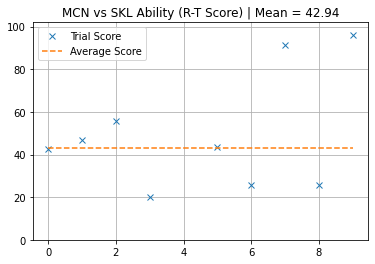

In [3]:
# Get data
X, Y = load_diabetes(return_X_y=True)
x1, x2, y1, y2 = TTSplit(X, Y)

# Make MCnet params
Ieta_gen    = 3         # Done 1
Beta_gen    = 8         # Done 2
Gamma_gen   = 1         # Done 1

Ieta_fit    = 3         # Done 1
Beta_fit    = 5         # Done 2
Gamma_fit   = 1         # Done 1


# Run many tests
scores = []
iterations = 10
for it in range(iterations):
    t1 = pc()

    model1 = generate_model(x1, y1, hidden_layers=[10]*2, test_activations=['silu', 'elu'], Ieta=Ieta_gen, Gamma=Gamma_gen, Beta=Beta_gen, verbose=False)
    model1.fit(x1, y1, Ieta=Ieta_fit, Beta=Beta_fit, Gamma=Gamma_fit, verbose=False)

    t2 = pc()

    model2 = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000, verbose=False)
    model2.fit(x1, y1)

    t3 = pc()

    scores.append(100 * (model1.score(X, Y)/(t2-t1)) / (model2.score(X, Y)/(t3-t2)))

    # print(f"Finished Iteration #{it+1}      ", end='\r')

# Plot results
plt.plot(scores, 'x')
plt.plot([0, len(scores)-1], [np.mean(scores)]*2, '--')
plt.legend(['Trial Score', 'Average Score'])
plt.grid(True)
plt.title(f"MCN vs SKL Ability (R-T Score) | Mean = {format(np.mean(scores), '.2f')}")
plt.ylim(bottom=0)
plt.show()

## Test params!

c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(ob

Finished test #1


c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(ob

Finished test #2


c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Sean\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(ob

Finished test #3
[45.32527656013812, 49.7022449017486, 43.05896939277878]


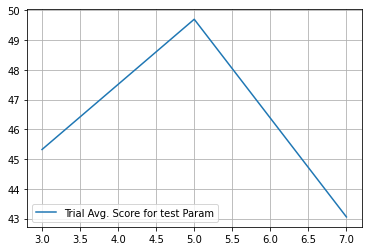

In [15]:
# Get data
X, Y = load_diabetes(return_X_y=True)
x1, x2, y1, y2 = TTSplit(X, Y)

# Results Log
notes = """

Misc:
- Changed iterations to 50
    - Changes total time from ~8*3*6 (~144 mins) to ~72 mins

# Tests

- Gamma_gen
    - tests:    [1, 2, 3]
    - scores:   [30.463848668568513, 30.12828520894398, 27.066279096441544]
    - best val: 1

- Gamma_fit
    - tests:    [1, 2, 3]
    - scores:   [43.95032418488625, 36.15354160703687, 42.761599237021365]
    - best val: 1

- Beta_gen
    - tests:    [5, 10, 15]
    - scores:   [28.57102506405795, 34.07344195137775, 29.447770007719672]
    - best val: 10

- Beta_fit
    - tests:    [5, 10, 15]
    - scores:   [46.271764223922276, 37.981540837327245, 35.57364754607917]
    - best val: 5

- Ieta_gen
    - tests:    [2, 3, 4]
    - scores:   [-813.0909028163795, 40.453461846650846, 36.26784515625548]
    - best val: 3

- Ieta_fit
    - tests:    [2, 3, 4]
    - scores:   [35.19012433143859, 37.967218648827455, 37.78003261898565]
    - best val: 3

- Beta_gen
    - tests:    [8, 10, 12]
    - scores:   [46.344759216175156, 42.19723624866654, 39.235000255917676]
    - best val: 8

- Beta_fit
    - tests:    [3, 5, 7]
    - scores:   [45.32527656013812, 49.7022449017486, 43.05896939277878]
    - best val: 5

"""

# Plotting
plotx = []
ploty = []

for param in [3, 5, 7]:
    # Make MCnet params
    Ieta_gen    = 3         # Done 1
    Beta_gen    = 8         # Done 2
    Gamma_gen   = 1         # Done 1

    Ieta_fit    = 3         # Done 1
    Beta_fit    = 5         # Done 2
    Gamma_fit   = 1         # Done 1

    # Plotting
    plotx.append(param)

    # Run many tests
    scores = []
    iterations = 50
    for it in range(iterations):
        t1 = pc()

        model1 = generate_model(x1, y1, hidden_layers=[10]*2, test_activations=['silu', 'elu'], Ieta=Ieta_gen, Beta=Beta_gen, Gamma=Gamma_gen, verbose=False)
        model1.fit(x1, y1, Ieta=Ieta_fit, Beta=Beta_fit, Gamma=Gamma_fit, verbose=False)

        t2 = pc()

        model2 = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000, verbose=False)
        model2.fit(x1, y1)

        t3 = pc()

        scores.append(100 * (model1.score(X, Y)/(t2-t1)) / (model2.score(X, Y)/(t3-t2)))

        # print(f"Finished Iteration #{it+1}      ", end='\r')

    # Plotting
    ploty.append(np.mean(scores))
    print(f"Finished test #{len(plotx)}")

# Plot results
print(ploty)
plt.plot(plotx, ploty)
plt.legend(['Trial Avg. Score for test Param'])
plt.grid(True)
plt.show()